# Image Processing and Pattern Recognition - Group Assignment
# Feature Extraction + Decision Tree & Random Forest Classifiers

By: Shuntian Shi  
Purpose: This script reads preprocessed image data from manifest.csv,
trains both Decision Tree and Random Forest models,  
evaluates performance, and visualizes the results.  


In [6]:
import pandas as pd

from PIL import Image
import numpy as np
import os
print(os.getcwd())
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import tree
import matplotlib.pyplot as plt

e:\UTS\42177 Image Processing and Pattern Recognition - Spring 2025\Project\42177-parasite-classification-main\src\models


# --- 1. Load manifest.csv ---

In [ ]:
file_path_absolute=r"E:\UTS\42177 Image Processing and Pattern Recognition - Spring 2025\Project\42177-parasite-classification-main\data\manifest\manifest.csv"
file_path_relative=r"data\manifest\manifest.csv"
dataframe=pd.read_csv(file_path_absolute) # Select the right path

print("head:")
print(dataframe.head())
print()

train_df=dataframe[dataframe["subset"]=="train"]
test_df=dataframe[dataframe["subset"]=="test"]


head:
   id                                           filepath         label subset
0   1  E:\UTS\42177 Image Processing and Pattern Reco...  babesia_1173    val
1   2  E:\UTS\42177 Image Processing and Pattern Reco...  babesia_1173    val
2   3  E:\UTS\42177 Image Processing and Pattern Reco...  babesia_1173  train
3   4  E:\UTS\42177 Image Processing and Pattern Reco...  babesia_1173    val
4   5  E:\UTS\42177 Image Processing and Pattern Reco...  babesia_1173    val



# --- 2. Define a simple feature extractor ---

In [8]:
# Extract features
# This function converts an image into a multi-dimensional feature vector
def extract_features(img_path):
    # Convert the images to RGB, and resize for consistency
    img = Image.open(img_path).convert('RGB').resize((64, 64))
    arr = np.array(img) / 255.0

    # Basic stats per channel
    mean_r, mean_g, mean_b = arr.mean(axis=(0,1)) # Mean RGB values (3 features)
    std_r, std_g, std_b = arr.std(axis=(0,1)) # Standard deviation of RGB channels (3 features)

    # Flattened grayscale histogram (16 bins)
    gray = np.dot(arr[..., :3], [0.2989, 0.5870, 0.1140])
    hist, _ = np.histogram(gray, bins=16, range=(0,1))
    hist = hist / hist.sum()

    return np.hstack([mean_r, mean_g, mean_b, std_r, std_g, std_b, hist])

# --- 3. Build feature matrices for train and test sets ---

In [9]:
def build_dataset(df, root_dir):
    # X = feature matrix, y = label vector
    X, y = [], []
    for _, row in df.iterrows():
        path = os.path.join(root_dir, row["filepath"])
        X.append(extract_features(path))
        y.append(row["label"])
    return np.array(X), np.array(y) 

X_train, y_train = build_dataset(train_df, r"data\clean")
X_test,  y_test  = build_dataset(test_df,  r"data\clean")

# Train Decision Tree and Random Forest methods
# --- 4. Decision Tree training ---

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print()

Decision Tree Accuracy: 0.9631624927198602
                       precision    recall  f1-score   support

         babesia_1173       0.90      0.92      0.91       236
      leishmania_2701       0.91      0.90      0.91       541
  leukocyte_1000x_461       0.96      0.97      0.96        93
   leukocyte_400x_915       0.94      0.97      0.95       183
       plasmodium_843       0.88      0.82      0.85       170
            rbcs_8995       0.98      0.99      0.98      1799
toxoplasma_1000x_2933       0.96      0.95      0.96       588
 toxoplasma_400x_3758       0.99      0.98      0.98       753
    trichomonad_10134       0.98      0.98      0.98      2028
     trypanosome_2385       0.94      0.94      0.94       477

             accuracy                           0.96      6868
            macro avg       0.94      0.94      0.94      6868
         weighted avg       0.96      0.96      0.96      6868




# ---5. Random Forest training ---

In [11]:
# Random Forest is a collection of Decision Trees trained on random
# subsets of data and features. The results are more generalized.
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print()

Random Forest Accuracy: 0.983838089691322
                       precision    recall  f1-score   support

         babesia_1173       0.98      0.97      0.97       236
      leishmania_2701       0.98      0.92      0.95       541
  leukocyte_1000x_461       1.00      0.99      0.99        93
   leukocyte_400x_915       0.98      0.99      0.98       183
       plasmodium_843       0.95      0.90      0.92       170
            rbcs_8995       0.99      1.00      0.99      1799
toxoplasma_1000x_2933       0.97      0.99      0.98       588
 toxoplasma_400x_3758       0.99      0.99      0.99       753
    trichomonad_10134       0.98      1.00      0.99      2028
     trypanosome_2385       1.00      0.96      0.98       477

             accuracy                           0.98      6868
            macro avg       0.98      0.97      0.98      6868
         weighted avg       0.98      0.98      0.98      6868




# --- 6. Visualize a small part of the Decision Tree ---

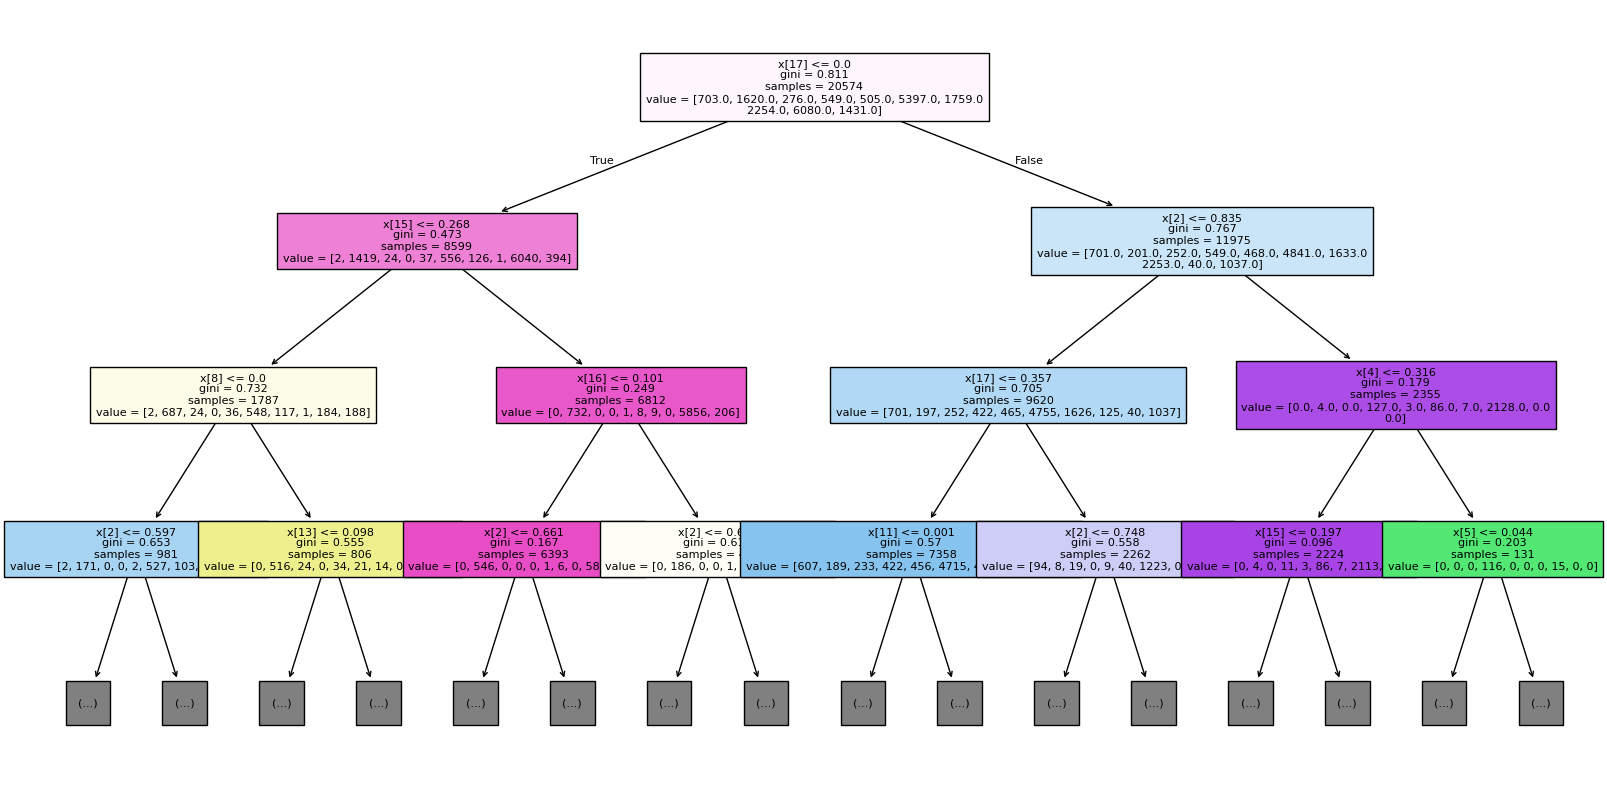

In [12]:
# max_depth=3 prevents the plot from being huge.
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, filled=True, max_depth=3, fontsize=8)
plt.show()

# --- 7. Inspect feature importance for the random forest ---

In [13]:
importances = rf.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {i}: {imp:.3f}")
print()

Feature 0: 0.041
Feature 1: 0.045
Feature 2: 0.103
Feature 3: 0.048
Feature 4: 0.052
Feature 5: 0.092
Feature 6: 0.003
Feature 7: 0.013
Feature 8: 0.021
Feature 9: 0.029
Feature 10: 0.052
Feature 11: 0.080
Feature 12: 0.029
Feature 13: 0.024
Feature 14: 0.040
Feature 15: 0.075
Feature 16: 0.075
Feature 17: 0.082
Feature 18: 0.018
Feature 19: 0.028
Feature 20: 0.036
Feature 21: 0.016



# --- 8. Display the confusion matrix ---

<Figure size 1000x800 with 0 Axes>

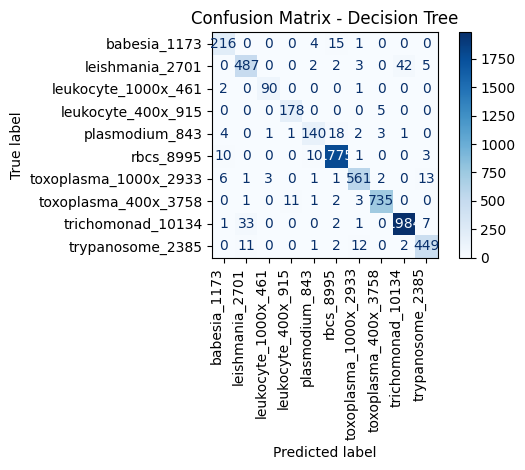

<Figure size 1000x800 with 0 Axes>

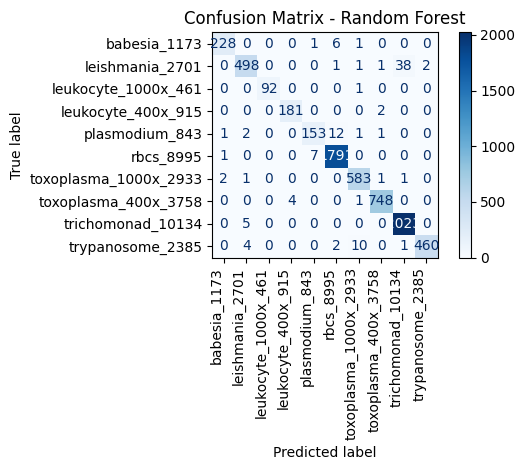

In [14]:
# Create the communication matrix for Decision Tree method
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels=dt.classes_)
plt.figure(figsize=(10,8))
disp_dt.plot(cmap=plt.cm.Blues, values_format='d')
plt.xticks(rotation=90,ha='right') # rotate x-axis labels
plt.yticks(rotation=0)
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout() # adjust layout to prevent clipping
plt.show()

# Create the communication matrix for Random Forests method
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
plt.figure(figsize=(10,8))
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.xticks(rotation=90,ha='right') # rotate x-axis labels
plt.yticks(rotation=0)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout() # adjust layout to prevent clipping
plt.show()